In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json


%matplotlib inline

In [3]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [4]:
Authorization = credentials['Authorization']

In [5]:
Authorization


'5f2680b713bddbda2b2a03bf89fa4751'

In [11]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'
params_AprilMay_MandF_AMPeak = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '04-30-2022',
}
params_geo_AprilMay_MandF_AMPeak  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates' : '04-30-2022',
}
params_May_AMPeak = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '04-30-2022',
}
params_geo_May_AMPeak  = {
    'direction': '1',
    'startDate': '04-25-2022',
    'endDate': '05-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates' : '04-30-2022',
    
}
headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

In [12]:
May_MandF_AMPeak = requests.get(URL, params = params_May_AMPeak, headers = headers)

In [13]:
response_May_AMPeak = May_MandF_AMPeak.json()


In [14]:
response_May_MandF_AMPeak = May_MandF_AMPeak.json()['data']['segments']

In [15]:
route56_May_MandF_AMPeak_df = pd.DataFrame(response_May_MandF_AMPeak)


In [16]:
r56_May_MandF_AMPeak_df = route56_May_MandF_AMPeak_df[['countForSegment','percent20Secs']]
r56_May_MandF_AMPeak_df.head(5)

,countForSegment,percent20Secs
0,383,1.701
1,392,2.187
2,398,1.366
3,390,1.515
4,397,1.405


In [20]:
geo_May_AMPeak = requests.get(URL, params = params_geo_May_AMPeak, headers = headers)

In [22]:
geo_response_May_AMPeak = geo_May_AMPeak.json()['features']


In [23]:
geo_56_May_AMPeak_df = gpd.GeoDataFrame.from_features(geo_response_May_AMPeak)


In [25]:
full_geo_56_May_AMPeak_df = pd.concat([geo_56_May_AMPeak_df, r56_May_MandF_AMPeak_df], axis=1)
full_geo_56_May_AMPeak_df.head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.246136,10.662311,5.716,3.373,2.798,2.388,1.9760,1.769,1.581,1.205,383,1.701
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,5.183,4.068,3.505,2.6860,2.329,1.973,1.305,392,2.187
2,"LINESTRING (-86.70952 36.27800, -86.70960 36.2...",GXIEDGEN,Edgemeade Station Inbound,GALNESSN,N Gallatin Pike & Nesbitt Ln Sb,24.913,1.578173,15.785975,2.952,1.915,1.766,1.674,1.5515,1.428,1.290,1.055,398,1.366
3,"LINESTRING (-86.74682 36.18735, -86.74691 36.1...",GALGRESF,Gallatin Ave & Greenwood Ave Sb,GALPETSN,Gallatin Ave & Petway Ave,23.839,1.889446,12.616926,7.171,2.446,1.963,1.808,1.6730,1.571,1.442,1.124,390,1.515
4,"LINESTRING (-86.72486 36.23414, -86.72487 36.2...",GXIWALTF,Walton Station Inbound,GALBROSF,Gallatin Pike & Broadmoor Sb,24.524,3.984020,6.155592,41.936,8.125,4.080,2.900,1.8320,1.504,1.317,0.916,397,1.405


In [26]:
full_geo_56_May_AMPeak_df['time_of_day']='6am - 9am AM Peak'
full_geo_56_May_AMPeak_df['start_date']= '03-25-2022'
full_geo_56_May_AMPeak_df['end_date']= '04-24-2022'
full_geo_56_May_AMPeak_df['direction']= 'Inbound'
full_geo_56_May_AMPeak_df['days']= 'Mon_Fri'
full_geo_56_May_AMPeak_df.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.246136,10.662311,5.716,3.373,...,1.769,1.581,1.205,383,1.701,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,5.183,...,2.329,1.973,1.305,392,2.187,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [27]:
full_geo_56_May_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,24.351657,3.395799,10.883531,35.205581,6.332672,4.247983,3.310275,2.335717,1.884720,1.537287,1.145893,367.920308,1.719494
std,0.437755,6.384182,4.305800,77.580298,15.757511,10.820886,8.150770,4.281979,2.234669,0.697146,0.225504,88.289094,1.543714
min,22.655000,1.303279,0.230809,2.117000,1.539000,1.442000,1.374000,1.281000,1.200000,1.070000,0.560000,18.000000,1.138000
25%,23.951000,1.704333,8.020850,4.664000,2.122000,1.877750,1.731250,1.575875,1.445250,1.308000,1.015000,386.000000,1.382250
50%,24.524000,2.171734,11.151569,10.685000,3.064000,2.404500,2.104000,1.795000,1.632000,1.463000,1.147000,390.000000,1.561000
75%,24.685000,3.047146,14.227517,33.286250,5.029250,3.493250,2.802750,2.160625,1.841000,1.595000,1.272000,395.000000,1.722000
max,24.913000,103.527148,18.874700,884.494000,256.225000,186.674000,140.820000,80.333000,47.039000,15.898000,2.076000,411.000000,35.279000


In [28]:
full_geo_56_May_AMPeak_df.countForSegment.value_counts().head(2)

390    87
391    62
Name: countForSegment, dtype: int64

In [29]:
full_geo_56_May_AMPeak_df.head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.246136,10.662311,5.716,3.373,...,1.769,1.581,1.205,383,1.701,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,5.183,...,2.329,1.973,1.305,392,2.187,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,"LINESTRING (-86.70952 36.27800, -86.70960 36.2...",GXIEDGEN,Edgemeade Station Inbound,GALNESSN,N Gallatin Pike & Nesbitt Ln Sb,24.913,1.578173,15.785975,2.952,1.915,...,1.428,1.290,1.055,398,1.366,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,"LINESTRING (-86.74682 36.18735, -86.74691 36.1...",GALGRESF,Gallatin Ave & Greenwood Ave Sb,GALPETSN,Gallatin Ave & Petway Ave,23.839,1.889446,12.616926,7.171,2.446,...,1.571,1.442,1.124,390,1.515,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,"LINESTRING (-86.72486 36.23414, -86.72487 36.2...",GXIWALTF,Walton Station Inbound,GALBROSF,Gallatin Pike & Broadmoor Sb,24.524,3.984020,6.155592,41.936,8.125,...,1.504,1.317,0.916,397,1.405,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [30]:
full_geo_56_May_AMPeak_df['countForSegment'].max()/2

205.5

In [31]:
x_geo_56_May_AMPeak_df=full_geo_56_May_AMPeak_df[full_geo_56_May_AMPeak_df['countForSegment'] > full_geo_56_May_AMPeak_df['countForSegment'].max()/2]
x_geo_56_May_AMPeak_df

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.246136,10.662311,5.716,3.373,...,1.769,1.581,1.205,383,1.701,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,5.183,...,2.329,1.973,1.305,392,2.187,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,"LINESTRING (-86.70952 36.27800, -86.70960 36.2...",GXIEDGEN,Edgemeade Station Inbound,GALNESSN,N Gallatin Pike & Nesbitt Ln Sb,24.913,1.578173,15.785975,2.952,1.915,...,1.428,1.290,1.055,398,1.366,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,"LINESTRING (-86.74682 36.18735, -86.74691 36.1...",GALGRESF,Gallatin Ave & Greenwood Ave Sb,GALPETSN,Gallatin Ave & Petway Ave,23.839,1.889446,12.616926,7.171,2.446,...,1.571,1.442,1.124,390,1.515,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,"LINESTRING (-86.72486 36.23414, -86.72487 36.2...",GXIWALTF,Walton Station Inbound,GALBROSF,Gallatin Pike & Broadmoor Sb,24.524,3.984020,6.155592,41.936,8.125,...,1.504,1.317,0.916,397,1.405,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,"LINESTRING (-86.75925 36.17521, -86.75949 36.1...",GXI7AVEN,Main Street Station Inbound,MAI5STWN,Main St & 5th St Wb,24.565,2.044265,12.016544,4.829,2.622,...,1.768,1.574,1.340,388,1.687,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
773,"LINESTRING (-86.74424 36.19297, -86.74434 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,18.996131,1.261889,108.587,57.137,...,2.317,1.777,0.908,381,1.921,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
774,"LINESTRING (-86.71044 36.27069, -86.71047 36.2...",GALNESSN,N Gallatin Pike & Nesbitt Ln Sb,GALLOVSN,Gallatin Pike & Lovell St Sb,24.685,1.520807,16.231514,2.219,1.792,...,1.415,1.298,1.037,389,1.354,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
775,"LINESTRING (-86.76493 36.17303, -86.76518 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,17.923741,1.386764,333.290,48.947,...,2.709,2.021,1.600,390,2.283,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [33]:
x_geo_56_May_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,24.354726,3.219120,11.094630,35.550877,5.845266,3.953055,3.087044,2.241290,1.846773,1.522577,1.126752,390.176712,1.692677
std,0.438577,5.728837,4.285879,77.930999,13.832626,9.071868,6.776045,3.889809,2.171010,0.675303,0.208982,12.229190,1.503734
min,22.655000,1.303279,0.230809,2.117000,1.539000,1.442000,1.374000,1.281000,1.200000,1.070000,0.560000,237.000000,1.138000
25%,23.971000,1.692647,8.220711,4.664000,2.076750,1.851000,1.719250,1.563875,1.442000,1.303000,1.009000,386.000000,1.379250
50%,24.524000,2.113628,11.426830,10.698500,2.921000,2.337000,2.058500,1.778000,1.604500,1.439500,1.141000,390.000000,1.528500
75%,24.685000,2.986077,14.490702,33.730250,4.843000,3.401250,2.728750,2.100250,1.819750,1.593750,1.247000,395.000000,1.713000
max,24.913000,103.527148,18.874700,884.494000,256.225000,186.674000,140.820000,80.333000,47.039000,15.898000,2.076000,411.000000,35.279000


import numpy as np
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print p
3.0

In [35]:
import numpy as np

In [36]:
p_20 = np.percentile(x_geo_56_May_AMPeak_df['percent20Secs'], 80)
p_20

1.75

In [38]:
x_geo_56_May_AMPeak_df.head()['percent20Secs']>=p_20

0    False
1     True
2    False
3    False
4    False
Name: percent20Secs, dtype: bool

In [39]:
filtered_geo_56_May_AMPeak_df=x_geo_56_May_AMPeak_df[x_geo_56_May_AMPeak_df['percent20Secs']>=np.percentile(x_geo_56_May_AMPeak_df['percent20Secs'], 80)]
filtered_geo_56_May_AMPeak_df

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,5.183,...,2.329,1.973,1.305,392,2.187,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
21,"LINESTRING (-86.77882 36.16763, -86.77906 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.450931,5.364720,51.347,6.370,...,2.344,2.019,1.325,391,2.214,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
24,"LINESTRING (-86.74392 36.19357, -86.74403 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,3.094422,7.746519,26.871,5.027,...,1.855,1.601,0.908,386,1.756,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
28,"LINESTRING (-86.77812 36.16793, -86.77835 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.856548,6.191547,34.123,6.809,...,2.304,1.741,1.198,394,2.075,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
34,"LINESTRING (-86.74445 36.19258, -86.74455 36.1...",GXIDOUGN,Douglas Station Inbound,GALGRESF,Gallatin Ave & Greenwood Ave Sb,23.880,3.060305,7.803144,9.254,5.030,...,2.141,1.770,0.904,383,1.889,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,"LINESTRING (-86.73903 36.20266, -86.73914 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,3.391462,7.061556,22.493,6.586,...,1.836,1.639,1.303,383,1.755,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
764,"LINESTRING (-86.74413 36.19317, -86.74424 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,5.086258,4.712895,47.102,10.161,...,2.070,1.709,0.908,383,1.863,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
769,"LINESTRING (-86.74403 36.19337, -86.74413 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,3.856560,6.215643,47.649,6.716,...,1.984,1.671,0.908,384,1.837,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
773,"LINESTRING (-86.74424 36.19297, -86.74434 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,18.996131,1.261889,108.587,57.137,...,2.317,1.777,0.908,381,1.921,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [41]:
filtered_geo_56_May_AMPeak_df.sort_values(by=('percent20Secs'), ascending=False)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
188,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,95.996251,0.248739,884.494,193.426,...,47.039,15.898,2.076,327,35.279,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
425,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.895,103.527148,0.230809,522.791,256.225,...,32.889,7.700,1.300,372,17.498,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
198,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,22.716456,1.051132,558.935,31.861,...,15.739,5.877,2.076,338,13.231,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
242,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,11.819828,2.020165,118.060,17.652,...,8.682,3.955,2.076,344,7.041,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
398,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,7.933615,3.009725,118.060,12.896,...,5.355,3.785,2.006,358,4.840,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,"LINESTRING (-86.73903 36.20266, -86.73914 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,3.391462,7.061556,22.493,6.586,...,1.836,1.639,1.303,383,1.755,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
607,"LINESTRING (-86.74904 36.18227, -86.74913 36.1...",GXIEASTN,Eastland Station Inbound,GXIFIVEN,Five Points Station Inbound,23.743,2.282609,10.401694,18.364,2.881,...,1.829,1.666,1.361,391,1.753,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
703,"LINESTRING (-86.74965 36.18086, -86.74973 36.1...",GXIEASTN,Eastland Station Inbound,GXIFIVEN,Five Points Station Inbound,23.743,2.758287,8.607879,14.875,4.295,...,1.854,1.651,1.234,390,1.753,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
689,"LINESTRING (-86.74956 36.18106, -86.74965 36.1...",GXIEASTN,Eastland Station Inbound,GXIFIVEN,Five Points Station Inbound,23.743,2.582059,9.195375,22.449,3.934,...,1.826,1.635,1.234,390,1.750,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [42]:
filtered_geo_56_May_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,147.00000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,24.15634,6.661614,6.094094,77.904048,13.996381,8.829197,6.507218,4.220850,3.018980,2.069374,1.334503,387.040816,2.564048
std,0.40156,11.694665,2.764265,120.654804,27.941108,18.749810,14.244624,8.367636,4.655232,1.350375,0.215813,11.004282,3.199448
min,23.54400,2.048479,0.230809,5.215000,2.474000,2.312000,2.151000,1.983000,1.826000,1.513000,0.904000,327.000000,1.750000
25%,23.87800,2.996587,3.770275,18.339000,4.460000,3.485000,2.940000,2.318250,1.955500,1.679000,1.233000,386.000000,1.827000
50%,23.97100,3.738123,6.401892,43.285000,6.313000,4.249000,3.448000,2.642500,2.144000,1.777000,1.324000,389.000000,1.958000
75%,24.56500,6.354893,8.140716,77.638500,11.997000,7.146000,5.281500,3.359750,2.530000,1.981000,1.416000,391.000000,2.217500
max,24.85600,103.527148,11.657430,884.494000,256.225000,186.674000,140.820000,80.333000,47.039000,15.898000,2.076000,411.000000,35.279000


In [43]:
filtered_geo_56_May_AMPeak_df.reset_index().head()

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,1,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.289949,7.257863,35.895,...,2.329,1.973,1.305,392,2.187,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,21,"LINESTRING (-86.77882 36.16763, -86.77906 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,4.450931,5.364720,51.347,...,2.344,2.019,1.325,391,2.214,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,24,"LINESTRING (-86.74392 36.19357, -86.74403 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,3.094422,7.746519,26.871,...,1.855,1.601,0.908,386,1.756,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,28,"LINESTRING (-86.77812 36.16793, -86.77835 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.856548,6.191547,34.123,...,2.304,1.741,1.198,394,2.075,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,34,"LINESTRING (-86.74445 36.19258, -86.74455 36.1...",GXIDOUGN,Douglas Station Inbound,GALGRESF,Gallatin Ave & Greenwood Ave Sb,23.880,3.060305,7.803144,9.254,...,2.141,1.770,0.904,383,1.889,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


<AxesSubplot:>

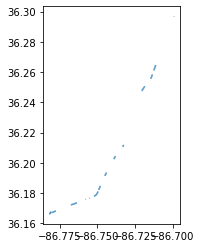

In [44]:
filtered_geo_56_May_AMPeak_df.plot()